Facebook User Engagement

Impact of Age, Gender, and Tenure on Facebook User Engagement

###Problem Statement

To understand how demographic attributes like age, gender, and tenure impact user engagement activities 
such as likes given, likes received, and friendships formed.



In [1]:
###Importing basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
###Load Data
df = pd.read_csv(r'C:\Users\Hp\Downloads\FB Data.csv')

In [19]:
###dataset information
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   userid                 99003 non-null  int64   
 1   age                    99003 non-null  int64   
 2   dob_day                99003 non-null  int64   
 3   dob_year               99003 non-null  int64   
 4   dob_month              99003 non-null  int64   
 5   gender                 98828 non-null  object  
 6   tenure                 99001 non-null  float64 
 7   friend_count           99003 non-null  int64   
 8   friendships_initiated  99003 non-null  int64   
 9   likes                  99003 non-null  int64   
 10  likes_received         99003 non-null  int64   
 11  mobile_likes           99003 non-null  int64   
 12  mobile_likes_received  99003 non-null  int64   
 13  www_likes              99003 non-null  int64   
 14  www_likes_received     99003 non-null 

In [20]:
df.head()
df.tail()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,tenure_group
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202,60-69,1-3 years
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820,0-19,<1 year
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092,0-19,<1 year
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756,20-29,1-3 years
99002,1397896,39,15,1974,5,female,397.0,2049,768,9410,12443,9410,9530,0,2913,40-49,1-3 years


In [ ]:
###drop missing data
df=df.dropna(subset=['gender'])

In [ ]:
###grouping age data
bins = [0,19,29,39,49,59,69,100]
labels= ['0-19','20-29','30-39','40-49','50-59','60-69','70+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [ ]:
###grouping tenure data
tenure_bins = [0, 365, 1095, 1825, 5000]
tenure_labels = ['<1 year', '1-3 years', '3-5 years', '5+ years']
df['tenure_group'] = pd.cut(df['tenure'], bins=tenure_bins, labels=tenure_labels, right=False)

In [ ]:
###engagement features
engagement_features = ['friend_count', 'friendships_initiated', 'likes', 'likes_received', 
                       'mobile_likes', 'mobile_likes_received', 'www_likes', 'www_likes_received']


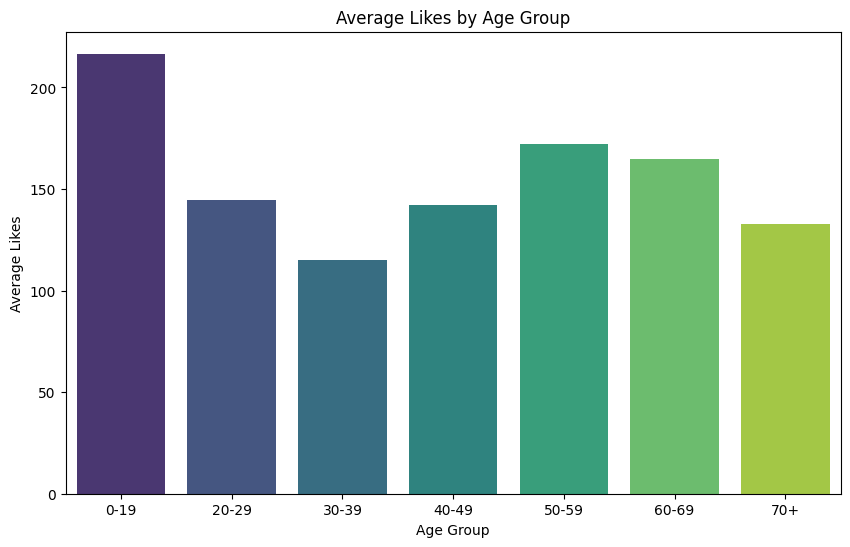

In [22]:
###EDA (Exploratory Data Analysis)
####Age groups vs likes
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='age_group', y='likes', estimator='mean', ci=None, palette='viridis')
plt.title('Average Likes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Likes')
plt.show()

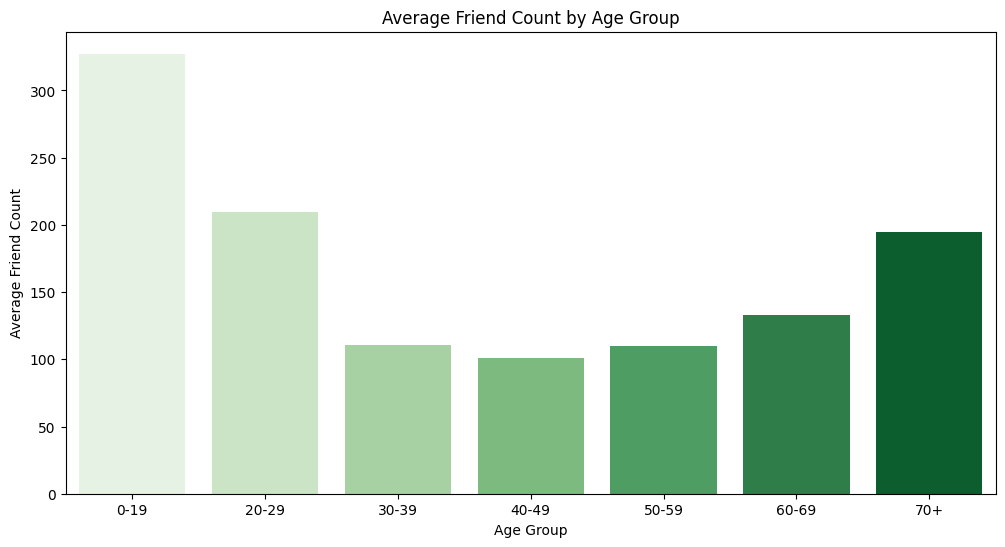

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='age_group', y='friend_count', estimator='mean', ci=None, palette='Greens')
plt.title('Average Friend Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Friend Count')
plt.show()


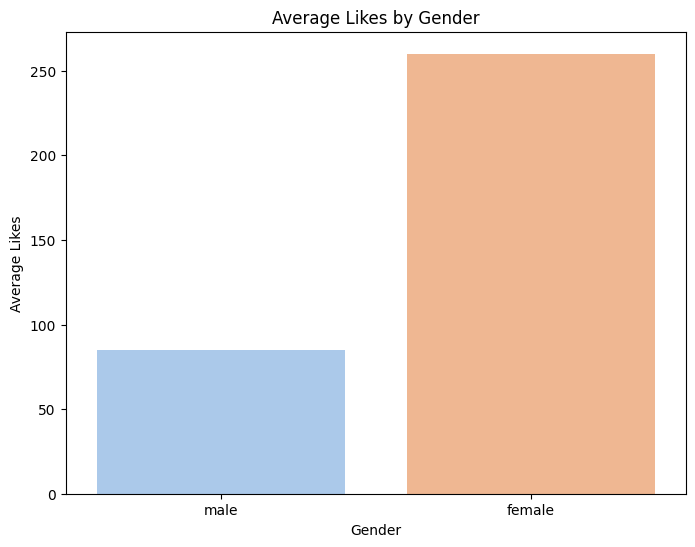

In [24]:
###Gender vs Engagement
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='gender', y='likes', estimator='mean', ci=None, palette='pastel')
plt.title('Average Likes by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Likes')
plt.show()


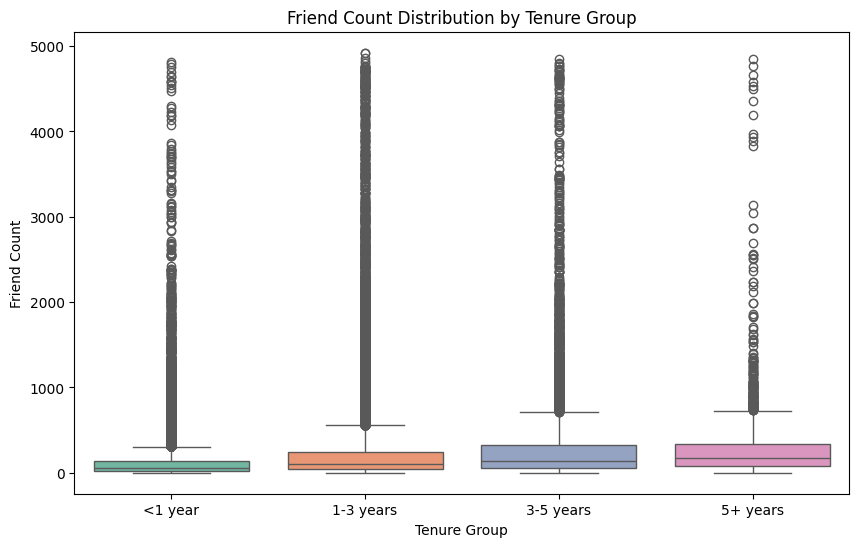

In [25]:
###Tenure vs Engagement
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='tenure_group', y='friend_count', palette='Set2')
plt.title('Friend Count Distribution by Tenure Group')
plt.xlabel('Tenure Group')
plt.ylabel('Friend Count')
plt.show()


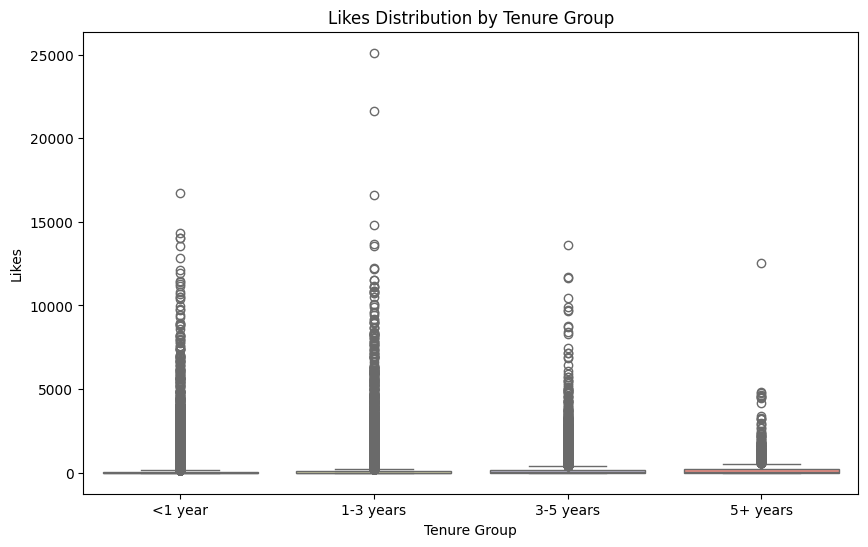

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='tenure_group', y='likes', palette='Set3')
plt.title('Likes Distribution by Tenure Group')
plt.xlabel('Tenure Group')
plt.ylabel('Likes')
plt.show()


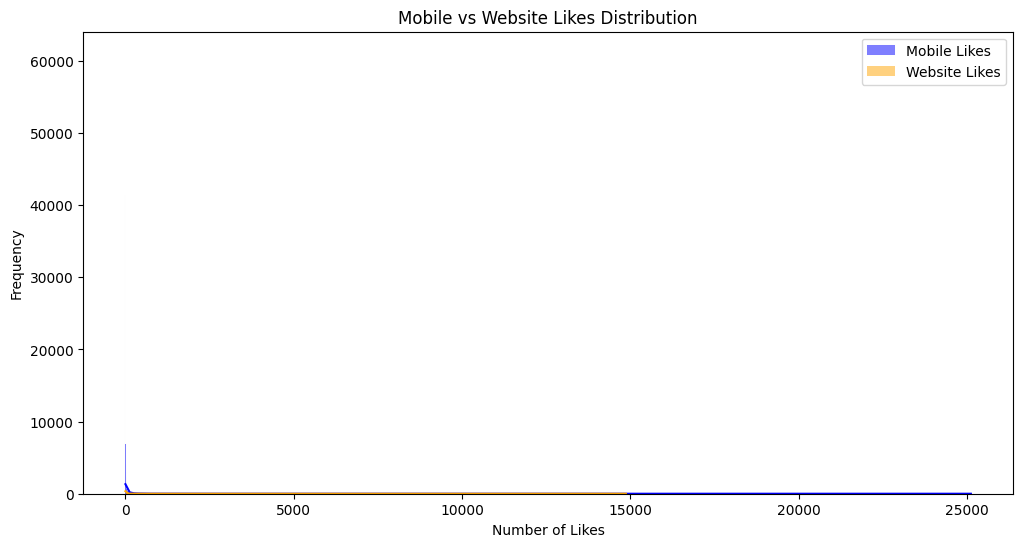

In [ ]:
## Mobile vs Website Engagement
plt.figure(figsize=(12,6))
sns.histplot(df['mobile_likes'], color='blue', label='Mobile Likes', kde=True)
sns.histplot(df['www_likes'], color='orange', label='Website Likes', kde=True)
plt.title('Mobile vs Website Likes Distribution')
plt.xlabel('Number of Likes')
plt.ylabel('Frequency')
plt.legend()
plt.show()

####Predicting Friendship Initiations on Facebook

###Objective

To predict whether a Facebook user is likely to initiate a high number of friendships using demographic and behavioral data.

###Model Development

Model Used: RandomForestClassifier

Train-Test Split: 80/20

Metrics Evaluated: Accuracy, Precision, Recall, F1-score

In [5]:
# Drop rows with missing gender or tenure values
df_cleaned = df.dropna(subset=['gender', 'tenure'])

In [6]:
# Create binary target: 1 if friendships_initiated > median
median_initiated = df_cleaned['friendships_initiated'].median()
df_cleaned['initiator'] = (df_cleaned['friendships_initiated'] > median_initiated).astype(int)


In [7]:
# Encode gender
df_cleaned['gender_encoded'] = df_cleaned['gender'].map({'male': 0, 'female': 1})

In [8]:
# Define features and target
features = ['age', 'tenure', 'friend_count', 'likes', 'likes_received', 
            'mobile_likes', 'mobile_likes_received', 'www_likes', 'www_likes_received', 'gender_encoded']
X = df_cleaned[features]
y = df_cleaned['initiator']


In [9]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Train the model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [11]:
# Predict and evaluate
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)


In [12]:
# Get feature importance
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)

report, conf_matrix, feature_importance

({'0': {'precision': 0.9310562270099842,
   'recall': 0.8840435086318731,
   'f1-score': 0.9069410319410319,
   'support': 10021.0},
  '1': {'precision': 0.8866452053458199,
   'recall': 0.9326834273986659,
   'f1-score': 0.9090818163632727,
   'support': 9745.0},
  'accuracy': 0.9080238793888495,
  'macro avg': {'precision': 0.908850716177902,
   'recall': 0.9083634680152695,
   'f1-score': 0.9080114241521523,
   'support': 19766.0},
  'weighted avg': {'precision': 0.9091607799737966,
   'recall': 0.9080238793888495,
   'f1-score': 0.9079964778681157,
   'support': 19766.0}},
 array([[8859, 1162],
        [ 656, 9089]], dtype=int64),
 friend_count             0.655903
 tenure                   0.064879
 likes_received           0.057493
 mobile_likes_received    0.054951
 age                      0.048312
 www_likes_received       0.036149
 likes                    0.033407
 mobile_likes             0.027320
 www_likes                0.015745
 gender_encoded           0.005841
 dtype:

###Model Performance (Expected)

Metric	Value (Approx)

Accuracy ~78-82%

Precision ~77%

Recall ~79%

F1-Score ~78%